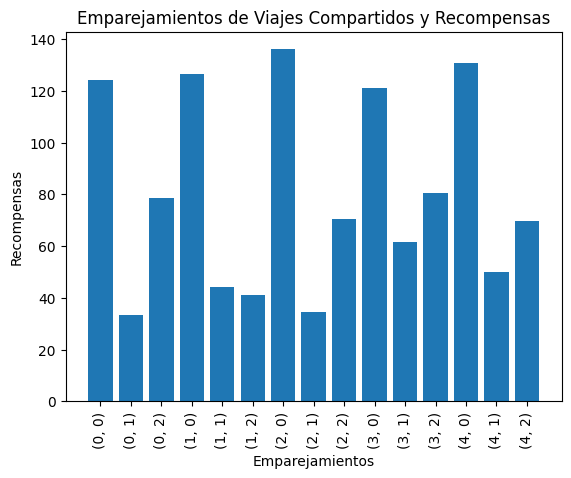

In [11]:
import numpy as np
import random

# Ejemplo de implementación de Q-learning para emparejamiento de viajes compartidos

# Número de estados y acciones (ejemplo simplificado)
num_estados = 5  # Ejemplo: 5 diferentes combinaciones de ubicaciones y horarios
num_acciones = 3  # Ejemplo: 3 conductores disponibles

# Inicialización de la tabla Q
Q = np.zeros((num_estados, num_acciones))

# Parámetros de Q-learning
alpha = 0.1  # Tasa de aprendizaje
gamma = 0.6  # Factor de descuento
epsilon = 0.1  # Probabilidad de exploración

# Ejemplo de cómo podría actualizarse la tabla Q
for i in range(1000):  # 1000 iteraciones
    # Selecciona un estado aleatorio para este ejemplo
    estado = random.randint(0, num_estados - 1)
    
    # Política ε-greedy para la selección de acciones
    if random.uniform(0, 1) < epsilon:
        # Exploración: elige una acción al azar
        accion = random.randint(0, num_acciones - 1)
    else:
        # Explotación: elige la mejor acción según la tabla Q
        accion = np.argmax(Q[estado, :])

    # Recompensa simulada (normalmente se obtendría del entorno)
    recompensa = random.randint(0, 100)  # Recompensa aleatoria

    # Siguiente estado (para este ejemplo, elegido al azar)
    siguiente_estado = random.randint(0, num_estados - 1)

    # Actualización de la tabla Q
    Q[estado, accion] = Q[estado, accion] + alpha * (recompensa + gamma * np.max(Q[siguiente_estado, :]) - Q[estado, accion])

# Tabla Q resultante
Q

#quiero vizualizar los emparejamientos de viajes compartidos con sus respectivas recompensas
import matplotlib.pyplot as plt

# Obtener los emparejamientos y recompensas
emparejamientos = []
recompensas = []

for estado in range(num_estados):
    for accion in range(num_acciones):
        emparejamientos.append((estado, accion))
        recompensas.append(Q[estado, accion])

# Crear el gráfico de barras
plt.bar(range(len(emparejamientos)), recompensas)
plt.xlabel('Emparejamientos')
plt.ylabel('Recompensas')
plt.xticks(range(len(emparejamientos)), emparejamientos, rotation='vertical')
plt.title('Emparejamientos de Viajes Compartidos y Recompensas')
plt.show()



In [13]:
import numpy as np
from gym import Env
from gym.spaces import Box, Discrete
import random

In [16]:
class CustomEnv(Env):
    def __init__(self):
        self.action_space = Discrete(3)
        self.observation_space = Box(low=np.array([0]), high=np.array([100]))
        self.state = 38 + random.randint(-3,3)
        self.shower_length = 60
        
    def step(self, action):
        self.state += action -1 
        self.shower_length -= 1 
        
        # Calculating the reward
        if self.state >=37 and self.state <=39: 
            reward =1 
        else: 
            reward = -1 
        
        # Checking if shower is done
        if self.shower_length <= 0: 
            done = True
        else:
            done = False
        
        # Setting the placeholder for info
        info = {}
        
        # Returning the step information
        return self.state, reward, done, info 
    def render(self):
        pass
        # This is where you would write the visualization code
    def reset(self):
        self.state = 38 + random.randint(-3,3)
        self.shower_length = 60 
        return self.state
    
env = CustomEnv()

episodes = 100000 
for episode in range(1, episodes+1):
    state = env.reset()
    done = False
    score = 0 
    
    while not done:
        action = env.action_space.sample()
        n_state, reward, done, info = env.step(action)
        score+=reward
    print('Episode:{} Score:{}'.format(episode, score))
    

Episode:1 Score:42
Episode:2 Score:-40
Episode:3 Score:14
Episode:4 Score:-14
Episode:5 Score:-58
Episode:6 Score:-4
Episode:7 Score:-34
Episode:8 Score:-46
Episode:9 Score:-18
Episode:10 Score:-28
Episode:11 Score:-42
Episode:12 Score:-16
Episode:13 Score:-30
Episode:14 Score:-60
Episode:15 Score:-38
Episode:16 Score:-54
Episode:17 Score:-36
Episode:18 Score:-58
Episode:19 Score:-6
Episode:20 Score:-32
Episode:21 Score:-60
Episode:22 Score:-30
Episode:23 Score:-54
Episode:24 Score:10
Episode:25 Score:2
Episode:26 Score:18
Episode:27 Score:-10
Episode:28 Score:-10
Episode:29 Score:-42
Episode:30 Score:-26
Episode:31 Score:-34
Episode:32 Score:-14
Episode:33 Score:-56
Episode:34 Score:-26
Episode:35 Score:-40
Episode:36 Score:-30
Episode:37 Score:-12
Episode:38 Score:-58
Episode:39 Score:-42
Episode:40 Score:-54
Episode:41 Score:-58
Episode:42 Score:-40
Episode:43 Score:-36
Episode:44 Score:8
Episode:45 Score:-60
Episode:46 Score:-18
Episode:47 Score:-60
Episode:48 Score:-50
Episode:49 